In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

In [2]:
df = pd.read_csv('gasPriceNew.csv', sep=';')
df['time'] = df['fechaHora'].apply(lambda x : pd.to_datetime(x))
df['gwei'] = df['gasPrice'].apply(lambda x : float(x.replace(' gwei', '')))
df

,fechaHora,gasPrice,time,gwei
0,2020-3-26 15:01:36,1 gwei,2020-03-26 15:01:36,1.00
1,2020-3-26 15:01:53,1 gwei,2020-03-26 15:01:53,1.00
2,2020-3-26 15:03:01,1 gwei,2020-03-26 15:03:01,1.00
3,2020-3-26 15:04:00,1 gwei,2020-03-26 15:04:00,1.00
4,2020-3-26 15:05:00,1 gwei,2020-03-26 15:05:00,1.00
...,...,...,...,...
46350,2020-5-18 3:10:00,0.75 gwei,2020-05-18 03:10:00,0.75
46351,2020-5-18 3:11:00,0.75 gwei,2020-05-18 03:11:00,0.75
46352,2020-5-18 3:12:00,0.75 gwei,2020-05-18 03:12:00,0.75
46353,2020-5-18 3:13:00,0.75 gwei,2020-05-18 03:13:00,0.75


In [4]:
min_time = df['time'].min()
max_time = df['time'].max()
min_gwei = df['gwei'].min()
max_gwei = df['gwei'].max()
print(min_time, '<--->', max_time)
print(min_gwei, '<--->', max_gwei)

2020-03-26 15:01:36 <---> 2020-05-18 03:14:00
5e-09 <---> 116.323529413


In [14]:
xticks = []
dia = pd.to_datetime('2020-03-27')
#xticks.append(pd.to_datetime(min_time))

while(dia <= pd.to_datetime(date.today())):
    xticks.append(dia)
    dia = dia + pd.DateOffset(days=1)

#xticks.append(pd.to_datetime(max_time))
xticks

[Timestamp('2020-03-27 00:00:00'),
 Timestamp('2020-03-28 00:00:00'),
 Timestamp('2020-03-29 00:00:00'),
 Timestamp('2020-03-30 00:00:00'),
 Timestamp('2020-03-31 00:00:00'),
 Timestamp('2020-04-01 00:00:00'),
 Timestamp('2020-04-02 00:00:00'),
 Timestamp('2020-04-03 00:00:00'),
 Timestamp('2020-04-04 00:00:00'),
 Timestamp('2020-04-05 00:00:00'),
 Timestamp('2020-04-06 00:00:00'),
 Timestamp('2020-04-07 00:00:00'),
 Timestamp('2020-04-08 00:00:00'),
 Timestamp('2020-04-09 00:00:00'),
 Timestamp('2020-04-10 00:00:00'),
 Timestamp('2020-04-11 00:00:00'),
 Timestamp('2020-04-12 00:00:00'),
 Timestamp('2020-04-13 00:00:00'),
 Timestamp('2020-04-14 00:00:00'),
 Timestamp('2020-04-15 00:00:00'),
 Timestamp('2020-04-16 00:00:00'),
 Timestamp('2020-04-17 00:00:00'),
 Timestamp('2020-04-18 00:00:00'),
 Timestamp('2020-04-19 00:00:00'),
 Timestamp('2020-04-20 00:00:00'),
 Timestamp('2020-04-21 00:00:00'),
 Timestamp('2020-04-22 00:00:00'),
 Timestamp('2020-04-23 00:00:00'),
 Timestamp('2020-04-

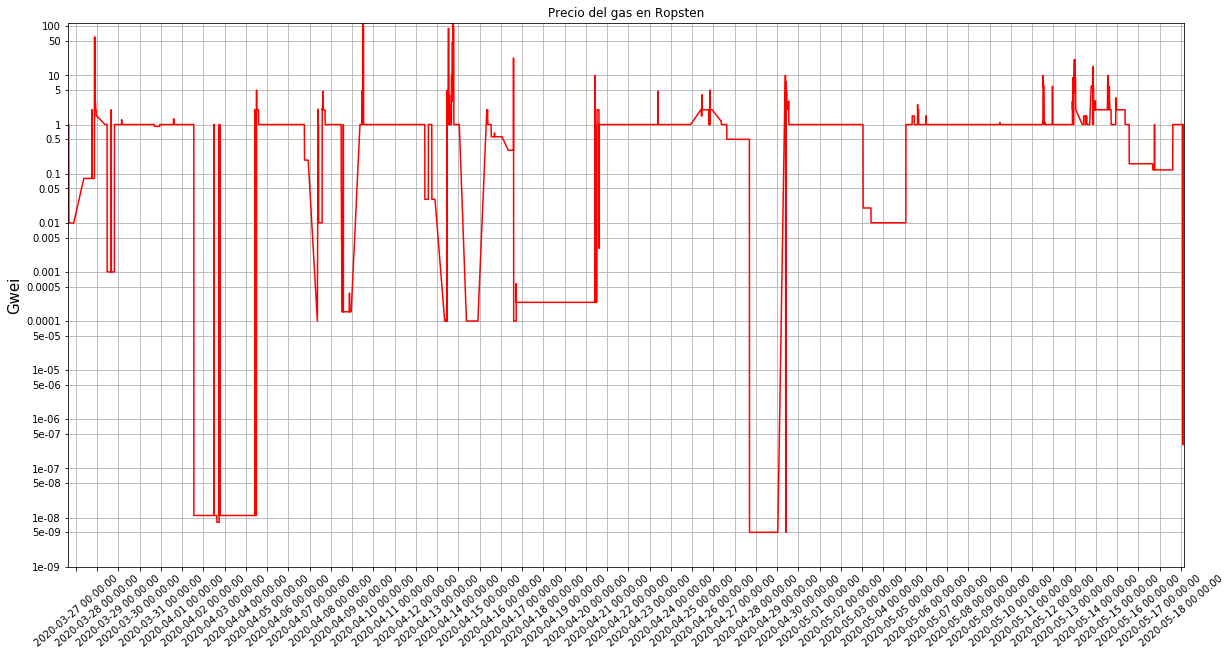

In [20]:
plt.figure(figsize=(20, 10))
plt.plot(df['time'], df['gwei'], color='r')
plt.title('Precio del gas en Ropsten')
plt.yscale('log')
plt.xlim(min_time, max_time)
plt.ylim(min_gwei, max_gwei)
yticks = [1e-9, 0.5e-8, 1e-8, 0.5e-7, 1e-7, 0.5e-6, 1e-6, 0.5e-5, 1e-5, 0.5e-4, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
plt.yticks(
    yticks,
    [str(i) for i in yticks]
)
plt.ylabel('Gwei', fontsize=15)
plt.xticks(
    xticks,
    [str(i) for i in xticks],
    rotation=40
)
plt.grid(True)
plt.savefig("gasPriceRopsten.png", format="png", bbox_inches='tight')
plt.show()